This block for installing dependencies


first try. test run for dataset

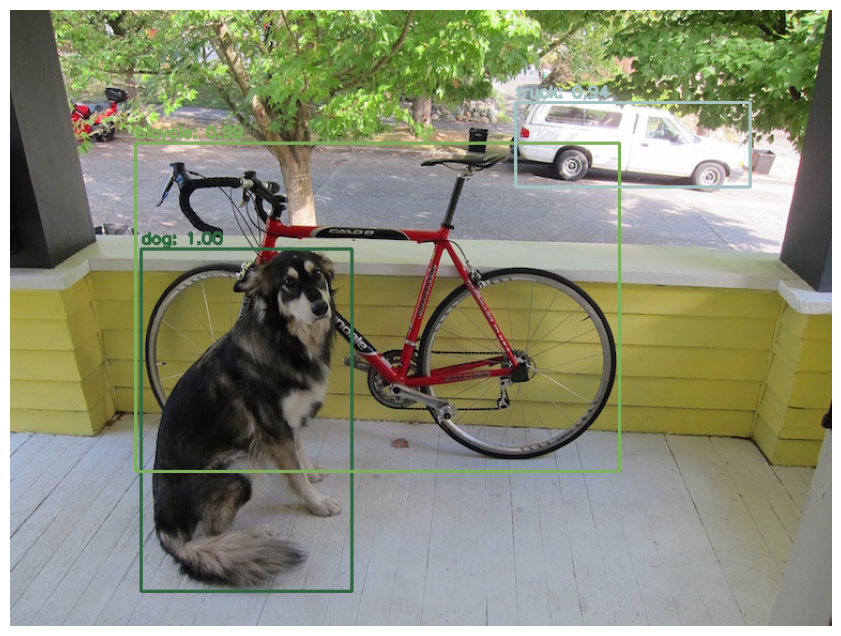

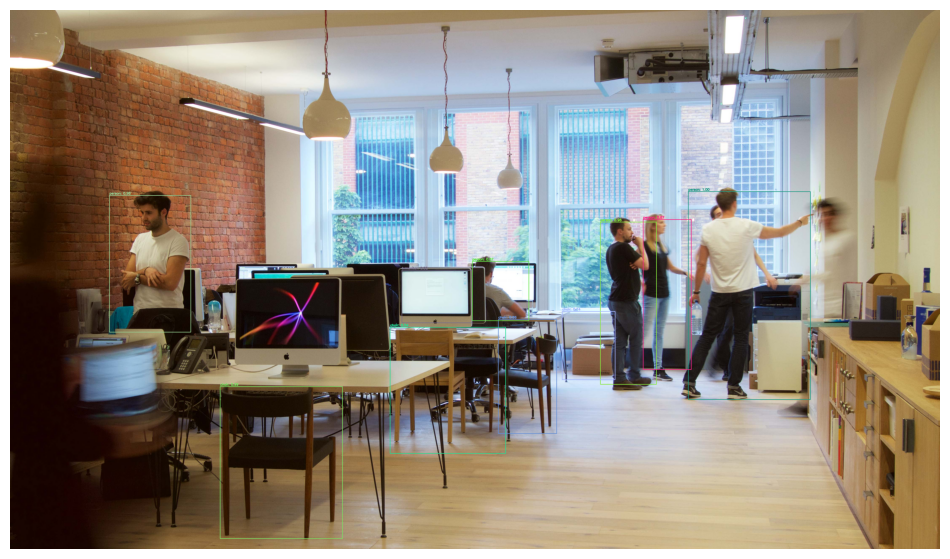

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Paths to the files/
weights_path = 'D:/for object detection/yolo-dataset/yolov3.weights'
config_path = 'D:/for object detection/yolo-dataset/yolov3.cfg'
names_path = 'D:/for object detection/yolo-dataset/coco.names'


# Load the class names
with open(names_path, 'r') as f:
    class_names = f.read().strip().split('\n')

# Load the YOLO model
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)
layer_names = net.getLayerNames()

# Check the type of the output layers
output_layers_indices = net.getUnconnectedOutLayers()
if isinstance(output_layers_indices, np.ndarray):
    output_layers = [layer_names[i - 1] for i in output_layers_indices.flatten()]
else:
    output_layers = [layer_names[i[0] - 1] for i in output_layers_indices]

# Function to perform object detection
def detect_objects(image_path):
    # Load the image
    image = cv2.imread(image_path)
    height, width = image.shape[:2]

    # Create a blob from the image
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Run the forward pass to get the outputs
    outputs = net.forward(output_layers)

    # Process the outputs
    boxes = []
    confidences = []
    class_ids = []
    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                box = detection[0:4] * np.array([width, height, width, height])
                (center_x, center_y, w, h) = box.astype("int")
                x = int(center_x - (w / 2))
                y = int(center_y - (h / 2))
                boxes.append([x, y, int(w), int(h)])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply non-maxima suppression
    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    # Draw the bounding boxes
    if len(indices) > 0:
        for i in indices.flatten():
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])
            color = [int(c) for c in np.random.randint(0, 255, size=3)]
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            text = f"{class_names[class_ids[i]]}: {confidences[i]:.2f}"
            cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Convert BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image with detections
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Example usage
detect_objects('D:/for object detection/yolo-dataset/dog.jpg')
detect_objects('D:/for object detection/yolo-dataset/office.jpg')


In [ ]:
# Paths to the files/
weights_path = 'D:/for object detection/yolo-dataset/yolov3.weights'
config_path = 'D:/for object detection/yolo-dataset/yolov3.cfg'
names_path = 'D:/for object detection/yolo-dataset/coco.names'

# Example usage
detect_objects('D:/for object detection/yolo-dataset/dog.jpg')
detect_objects('D:/for object detection/yolo-dataset/office.jpg')


second attempt. will be using darknet yolo. with droidcam yey

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Set the directory path
directory_path = "."

# Load YOLO model with custom weights and cfg
net = cv2.dnn.readNet(os.path.join(directory_path, "yolov3.weights"), 
                      os.path.join(directory_path, "yolov3.cfg"))

# Get the names of all layers
layer_names = net.getLayerNames()
unconnected_layers = net.getUnconnectedOutLayers().flatten()
output_layers = [layer_names[i - 1] for i in unconnected_layers]

# Load custom class names from _darknet.labels
classes = []
with open(os.path.join(directory_path, "_darknet.labels"), "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Initialize the webcam (change the index if necessary to match DroidCam)
cap = cv2.VideoCapture(1)  # Change the index if DroidCam is not the default

plt.ion()  # Enable interactive mode

while True:
    ret, frame = cap.read()
    if not ret:
        break

    height, width, channels = frame.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing information on the screen
    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = (0, 255, 0)
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.putText(frame, label, (x, y + 30), cv2.FONT_HERSHEY_PLAIN, 3, color, 3)

    # Display the resulting frame
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.draw()
    plt.pause(0.001)

    # Break the loop on 'q' key press
    if plt.waitforbuttonpress(0.01):
        break

cap.release()
plt.close()


FileNotFoundError: [Errno 2] No such file or directory: '.\\_darknet.labels'

Weights Path: .\yolov3.weights
Config Path: .\yolov3.cfg
Labels Path: .\train\_darknet.labels


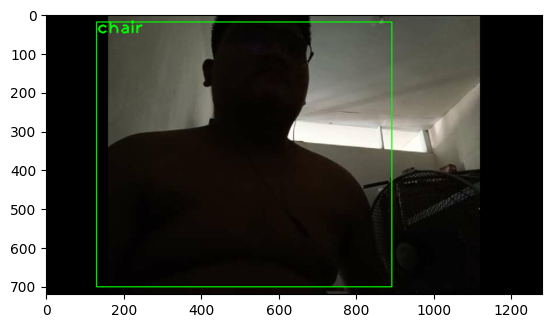

C:\Users\Admin\AppData\Local\Temp\ipykernel_13580\2524316710.py:98: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  if plt.waitforbuttonpress(0.01):


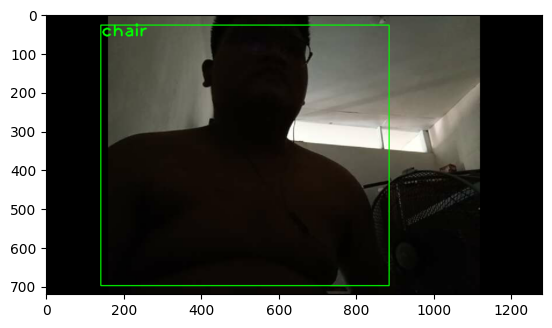

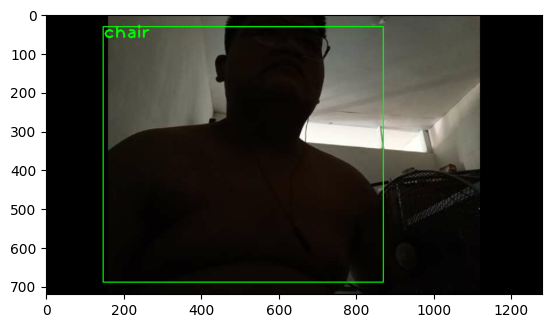

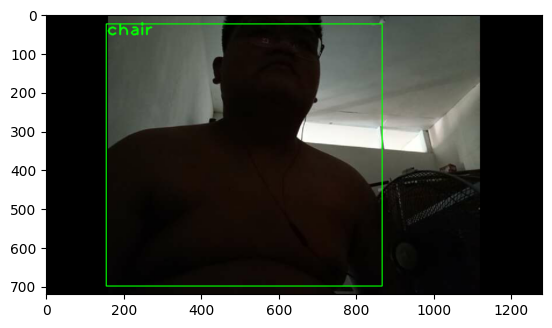

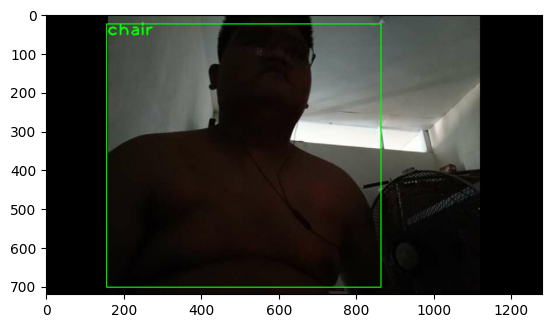

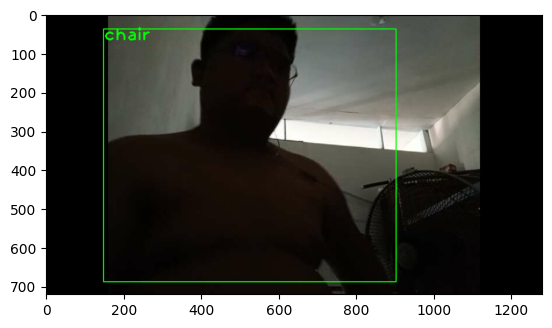

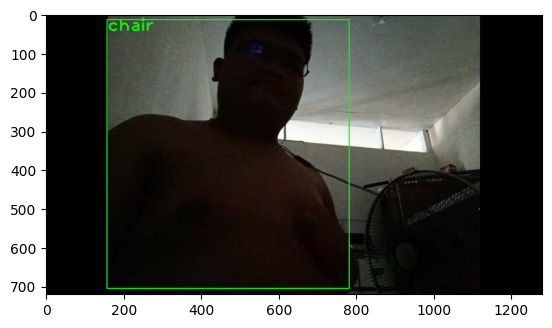

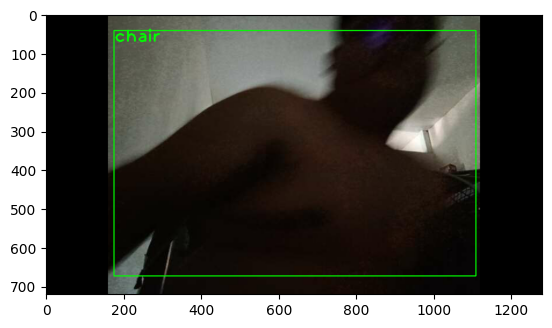

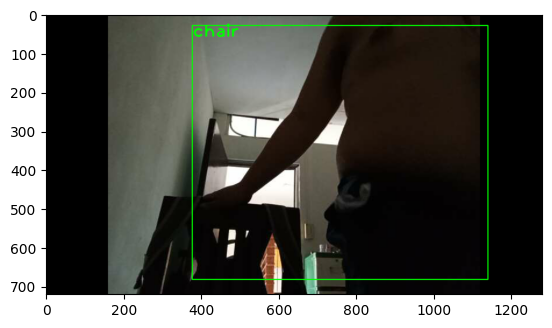

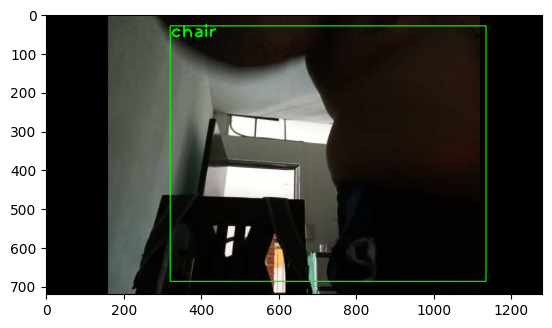

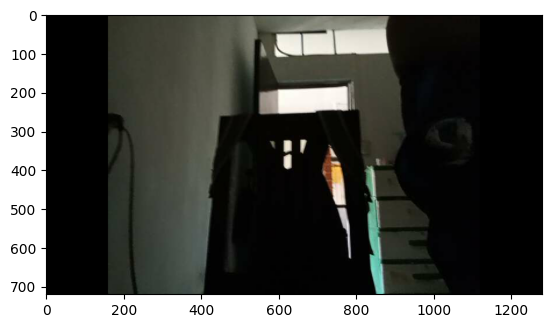

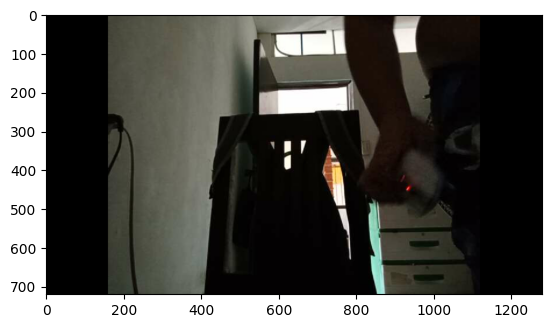

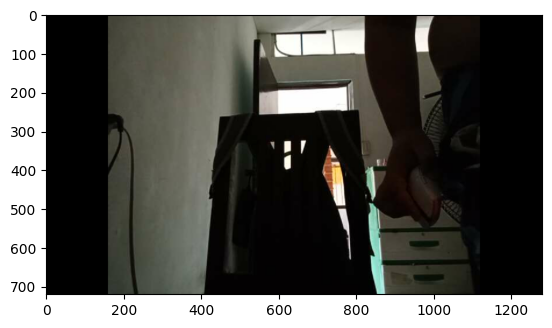

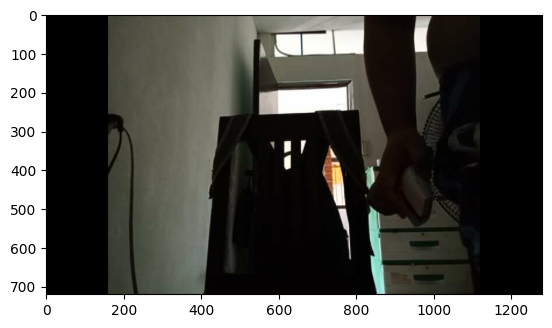

IndexError: list index out of range

<Figure size 640x480 with 0 Axes>

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Set the directory path and dataset folder
directory_path = "."
dataset_folder = "train"  # Change to "test" or "valid" as needed

# Construct the path to the labels file
labels_path = os.path.join(directory_path, dataset_folder, "_darknet.labels")
weights_path = os.path.join(directory_path, "yolov3.weights")
config_path = os.path.join(directory_path, "yolov3.cfg")

print("Weights Path:", weights_path)
print("Config Path:", config_path)
print("Labels Path:", labels_path)

# Check if files exist
if not os.path.isfile(weights_path):
    raise FileNotFoundError(f"Weights file not found: {weights_path}")
if not os.path.isfile(config_path):
    raise FileNotFoundError(f"Config file not found: {config_path}")
if not os.path.isfile(labels_path):
    raise FileNotFoundError(f"Labels file not found: {labels_path}")

# Load YOLO model with custom weights and cfg
net = cv2.dnn.readNet(weights_path, config_path)

# Get the names of all layers
layer_names = net.getLayerNames()
unconnected_layers = net.getUnconnectedOutLayers().flatten()
output_layers = [layer_names[i - 1] for i in unconnected_layers]

# Load custom class names from _darknet.labels
classes = []
with open(labels_path, "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Initialize the webcam (change the index if necessary to match DroidCam)
cap = cv2.VideoCapture(1)  # Change the index if DroidCam is not the default

plt.ion()  # Enable interactive mode

while True:
    ret, frame = cap.read()
    if not ret:
        break

    height, width, channels = frame.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing information on the screen
    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = (0, 255, 0)
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            cv2.putText(frame, label, (x, y + 30), cv2.FONT_HERSHEY_PLAIN, 3, color, 3)

    # Display the resulting frame
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.draw()
    plt.pause(0.001)

    # Break the loop on 'q' key press
    if plt.waitforbuttonpress(0.01):
        break

cap.release()
plt.close()
